# Conjugate gradient method

Consider solving
$$
-u_{xx} = f(x), \qquad x \in [0,1]
$$
with boundary condition
$$
u(0) = u(1) = 0
$$
Choose
$$
f(x) = 1
$$
The exact solution is
$$
u(x) = \frac{1}{2}x(1-x)
$$
Make a partition of $n$ intervals with spacing and grid points
$$
h = \frac{1}{n}, \qquad x_i = i h, \qquad i=0,1,\ldots,n
$$
The finite difference scheme is
\begin{eqnarray*}
u_0 &=& 0 \\
- \frac{u_{i-1} - 2 u_i + u_{i+1}}{h^2} &=& f_i, \qquad i=1,2,\ldots,n-1 \\
u_n &=& 0
\end{eqnarray*}
We have a matrix equation
$$
Au = f
$$

## Algorithm

* Set initial guess $u_0 = 0$, $r_0 = f - A u_0 = f$, $p_0 = 0$
* For $k=0,1,\ldots$
 * If $\| r_k \| < TOL \cdot \|f\|$, then stop
 * If $k=0$, $\beta_1 = 0$
 * If $k > 0$, $\beta_{k+1} = \frac{r_k^\top r_k}{r_{k-1}^\top r_{k-1}}$
 * $p_{k+1} = r_k + \beta_{k+1} p_k$
 * $\alpha_{k+1} = \frac{r_k^\top r_k}{p_{k+1}^\top A p_{k+1}}$
 * $u_{k+1} = u_k + \alpha_{k+1} p_{k+1}$
 * $r_{k+1} = r_k - \alpha_{k+1} p_{k+1}$

## Code

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

This function computes the matrix-vector product.

In [14]:
# Note that first and last components of r are always zero.
# This keeps boundary values of the solution unchanged.
def ax(h,u):
    n = len(u) - 1
    r = np.zeros(n+1)
    for i in range(1,n):
        r[i] = -(u[i-1]-2*u[i]+u[i+1])/h**2
    return r

We compute this without forming the matrix. Next, we define the problem parameters and implement the CG method.

iter,res = 0 9.9498743710662
iter,res = 1 69.29285677470659
iter,res = 2 67.87856804618082
iter,res = 3 66.46427611882942
iter,res = 4 65.04998078400943
iter,res = 5 63.63568181452914
iter,res = 6 62.22137896253984
iter,res = 7 60.80707195713337
iter,res = 8 59.39276050159645
iter,res = 9 57.97844427026304
iter,res = 10 56.56412290489439
iter,res = 11 55.14979601050214
iter,res = 12 53.73546315051168
iter,res = 13 52.32112384114085
iter,res = 14 50.90677754484169
iter,res = 15 49.49242366261726
iter,res = 16 48.078061524982445
iter,res = 17 46.66369038128036
iter,res = 18 45.24930938699504
iter,res = 19 43.83491758860735
iter,res = 20 42.42051390542079
iter,res = 21 41.00609710762534
iter,res = 22 39.59166578965829
iter,res = 23 38.17721833764213
iter,res = 24 36.762752889303584
iter,res = 25 35.34826728426726
iter,res = 26 33.9337590019143
iter,res = 27 32.51922508301819
iter,res = 28 31.104662029991573
iter,res = 29 29.69006567860704
iter,res = 30 28.275431031197378
iter,res = 31 26.

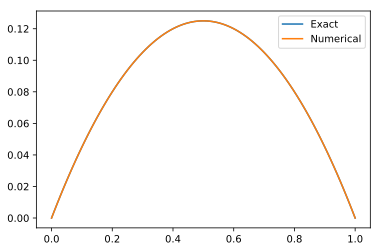

In [15]:
xmin, xmax = 0.0, 1.0
n = 100
h = (xmax - xmin)/n

x = np.linspace(0.0, 1.0, n+1) # Grid
f = np.ones(n+1)               # rhs
ue= 0.5*x*(1.0-x)              # exact solution

TOL   = 1.0e-6
itmax = 100

u   = np.zeros(n+1)
p   = np.zeros(n+1)
res = np.array(f)

# First and last grid point, solution is fixed to zero.
# Hence we make residual zero, in which case solution
# will not change at these points. These two will 
# remain zero throughout the following code.
res[0] = 0.0
res[n] = 0.0

f_norm = np.linalg.norm(f)
res_old, res_new = 0.0, 0.0
for it in range(itmax):
    res_new = np.linalg.norm(res)
    print('iter,res =', it, res_new)
    if res_new < TOL * f_norm:
        break
    if it==0:
        beta = 0.0
    else:
        beta = res_new**2 / res_old**2
    p = res + beta * p
    ap= ax(h,p)
    alpha = res_new**2 / p.dot(ap)
    u += alpha * p
    res -= alpha * ap
    res_old = res_new

print("Number of iterations = %d" % it)
plt.plot(x,ue,x,u)
plt.legend(("Exact","Numerical"));